Hyperparameter search for optimal judge-correct ratio for rewards.

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [130]:
test_df = pd.read_csv("./test.csv")
coef_df = test_df[test_df["int_reward_margin"] == True]
coef_df.head()

,generator_model,judge_coef,accuracy,test_examples,int_reward_margin,reward
0,Qwen-1.5B,0.0,0.5648,3.0,True,judge_exact
1,Qwen-1.5B,0.2,0.5337,3.0,True,judge_exact
2,Qwen-1.5B,0.4,0.5262,3.0,True,judge_exact
3,Qwen-1.5B,0.6,0.4966,5.0,True,judge_exact
4,Qwen-1.5B,0.8,0.4981,3.0,True,judge_exact


In [134]:
sparse_baseline = test_df[test_df["reward"] == "sparse_exact"]["accuracy"].iloc[0]
sparse_baseline

0.5239

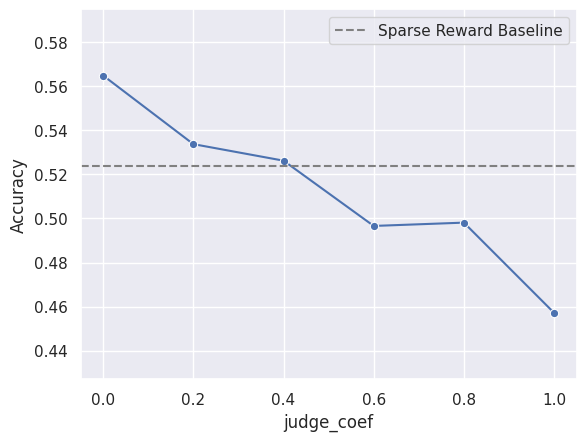

In [140]:
sns.lineplot(
    data=coef_df[coef_df["generator_model"] == "Qwen-1.5B"],
    x="judge_coef",
    y="accuracy",
    marker="o",
)
plt.ylim(coef_df[coef_df["generator_model"] == "Qwen-1.5B"]['accuracy'].min() - 0.03, coef_df[coef_df["generator_model"] == "Qwen-1.5B"]['accuracy'].max() + 0.03)
plt.ylabel("Accuracy")
plt.axhline(sparse_baseline, color="gray", linestyle="--", label="Sparse Reward Baseline")
plt.legend()
plt.show()

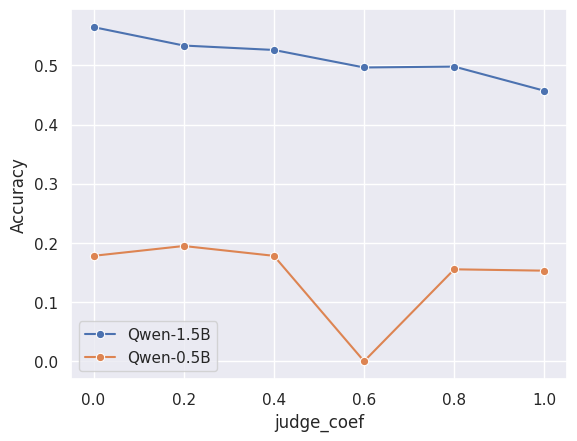

In [138]:
sns.lineplot(
    data=coef_df,
    x="judge_coef",
    y="accuracy",
    hue="generator_model",
    marker="o",
)
plt.ylim(coef_df['accuracy'].min() - 0.03, coef_df['accuracy'].max() + 0.03)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
df = pd.read_csv("./train.csv")
df = df[(df["generator_model"] == "Qwen/Qwen2.5-1.5B-Instruct") & (df["int_reward_margin"] == True)]
df["_step"] += 1
df.rename(columns={"cr_coef": "judge_coef"}, inplace=True)
df.head()

,_step,val_accuracy,val_examples_per,generator_model,reward,int_reward_margin,judge_coef
0,1,0.450,2,Qwen/Qwen2.5-1.5B-Instruct,judge_exact,True,0.0
1,2,0.482,2,Qwen/Qwen2.5-1.5B-Instruct,judge_exact,True,0.0
2,3,0.478,2,Qwen/Qwen2.5-1.5B-Instruct,judge_exact,True,0.0
3,4,0.442,2,Qwen/Qwen2.5-1.5B-Instruct,judge_exact,True,0.0
4,5,0.478,2,Qwen/Qwen2.5-1.5B-Instruct,judge_exact,True,0.0


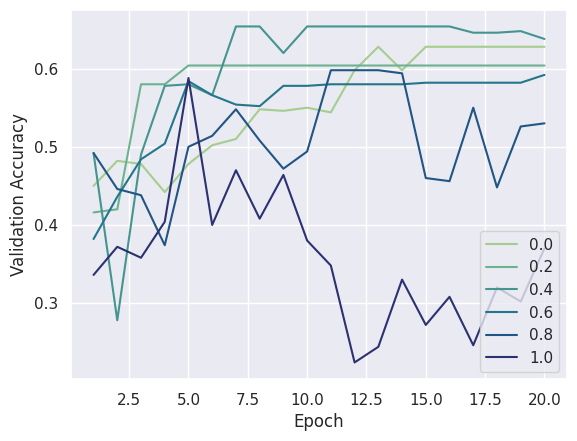

In [129]:
sns.lineplot(
    data=df,
    x="_step",
    y="val_accuracy",
    hue="judge_coef",
    palette="crest",
)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()